# Sleep Health and Lifestyle Analysis

### Import Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sleep_data=pd.read_csv("C:/Users/faizan.arshad/Desktop/Personal/python projects/sleep_health_and_lifestyle_analysis/Sleep_health_and_lifestyle_dataset.csv")
df=pd.DataFrame(sleep_data)
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


### Data Cleaning

In [3]:
#Check Columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [4]:
# Check for null values

df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [5]:
# Replace null values with None in 'Sleep Disorder' column

df['Sleep Disorder']=df['Sleep Disorder'].fillna('None')

In [6]:
# Again Check for null values 

df.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [7]:
df.shape

(374, 13)

In [8]:
# Check the different values in different tables

df.nunique()

Person ID                  374
Gender                       2
Age                         31
Occupation                  11
Sleep Duration              27
Quality of Sleep             6
Physical Activity Level     16
Stress Level                 6
BMI Category                 4
Blood Pressure              25
Heart Rate                  19
Daily Steps                 20
Sleep Disorder               3
dtype: int64

### Analysis Content
#### 1.Sleep Disorder By Gender
#### 2.Sleep Disorder By Occupation
#### 3.Sleep Duration Group By Age Group
#### 4.Sleep Duration By Gender
#### 5.Quality Of Sleep By Gender
#### 6.Quality Of Sleep By Age Group
#### 7.Quality Of Sleep By Occupation
#### 8.Quality Of Sleep By Physical Activity
#### 9.Correlation Between Quality Of Sleep And Physical Activity
#### 10.Relation Between Occupation And Blood Pressure
#### 11.Relation Between Occupation And Physical Activity
#### 12.Relation Between Occupation And Bmi Category

In [9]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


#### 1.SLEEP DISORDER BY GENDER

   Gender Sleep Disorder  Count
0  Female       Insomnia     36
1  Female           None     82
2  Female    Sleep Apnea     67
3    Male       Insomnia     41
4    Male           None    137
5    Male    Sleep Apnea     11


[Text(0.5, 23.52222222222222, 'Number of People')]

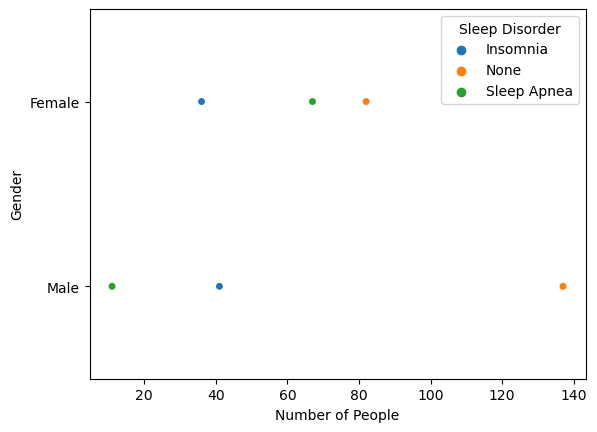

In [10]:
#Create table for sleep disorder by gender

sleep_disorder_by_gender = df.groupby(['Gender', 'Sleep Disorder']).size().reset_index(name='Count')
print(sleep_disorder_by_gender)

""""# Plot bar for sleep disorder by gender

plt.figure(figsize=(7, 4))
ax=sns.barplot(data=sleep_disorder_by_gender, x='Sleep Disorder', y='Count', hue='Gender', palette='pastel')

# Add data labels
for container in ax.containers:
    ax.bar_label(container)

plt.title('Sleep Disorders by Gender')
plt.xlabel('Sleep Disorder Type')
plt.ylabel('Number of People')
plt.tight_layout()
plt.show()
"""
# Draw a categorical scatterplot to show each observation
ax = sns.swarmplot(data=sleep_disorder_by_gender, x="Count", y="Gender", hue="Sleep Disorder")
ax.set(xlabel="Number of People")

#### 2.SLEEP DISORDER BY OCCUPATION

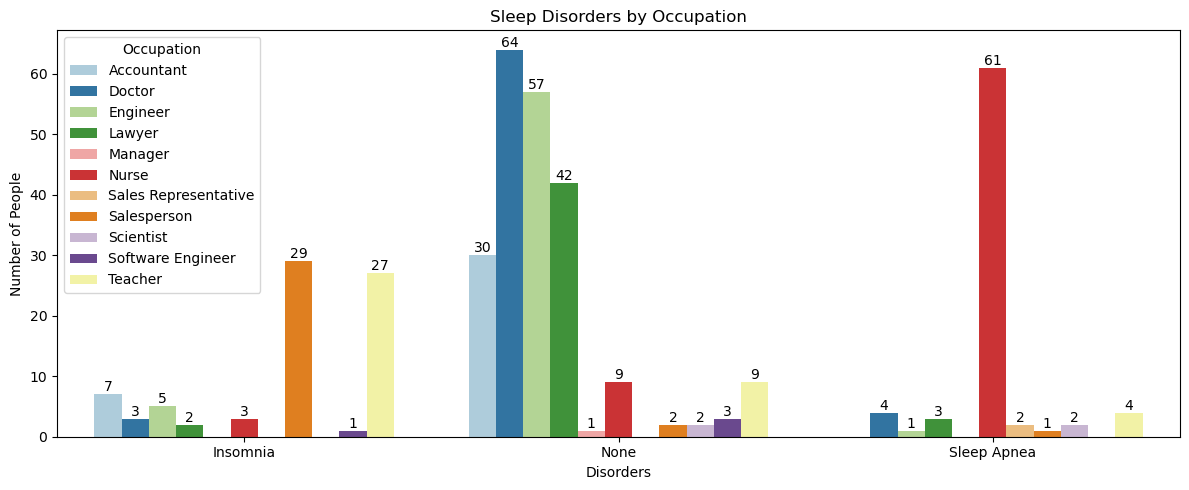

In [11]:
#Create table for sleep_disorder_by_occupation 

sleep_disorder_by_occupation=df.groupby(['Occupation','Sleep Disorder']).size().reset_index(name='count')

# Check table : sleep_disorder_by_occupation

sleep_disorder_by_occupation

# Plot bar for sleep_disorder_by_occupation

plt.figure(figsize=(12,5))
ax=sns.barplot(data=sleep_disorder_by_occupation, x='Sleep Disorder', y='count', hue='Occupation', palette="Paired")

for container in ax.containers:
    ax.bar_label(container)
    
plt.title('Sleep Disorders by Occupation')
plt.xlabel('Disorders')
plt.ylabel('Number of People')
plt.tight_layout()
plt.show()

#### 2.SLEEP DISORDER BY OCCUPATION SEGREGATED

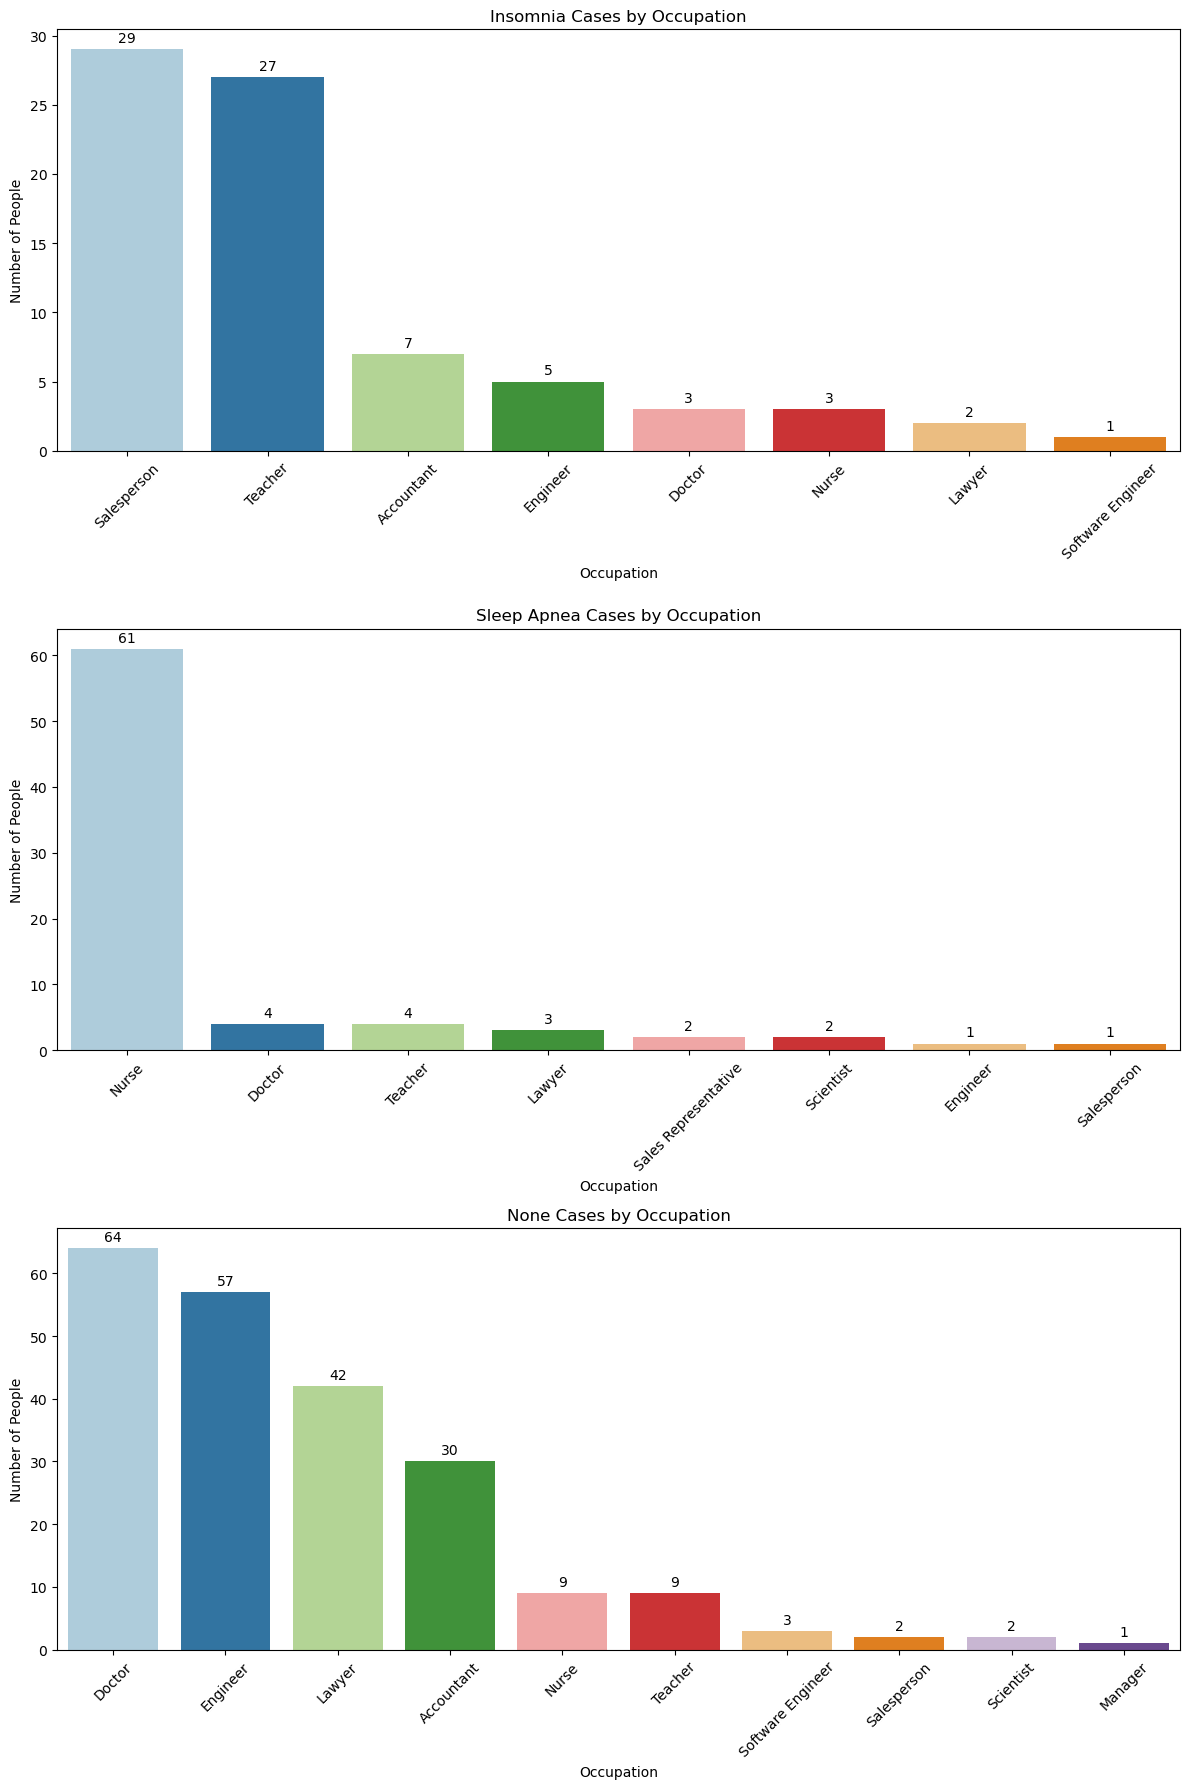

In [12]:
# List of disorders to loop through
disorders = ['Insomnia', 'Sleep Apnea', 'None']

# Set figure size
plt.figure(figsize=(12, 18))

# Loop to create 3 subplots
for i, disorder in enumerate(disorders, 1):
    plt.subplot(3, 1, i)
    
    # Filter and sort data by count (descending)
    df_subset = sleep_disorder_by_occupation[sleep_disorder_by_occupation['Sleep Disorder'] == disorder]
    df_subset = df_subset.sort_values(by='count', ascending=False)
    
    # Plot
    ax = sns.barplot(data=df_subset, x='Occupation', y='count', palette='Paired')
    
    # Rotate x-axis labels
    plt.xticks(rotation=45)
    
    # Add data labels (make sure each bar gets labeled)
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', padding=3)
    
    # Titles and labels
    plt.title(f'{disorder} Cases by Occupation')
    plt.xlabel('Occupation')
    plt.ylabel('Number of People')

# Improve layout
plt.tight_layout()
plt.show()

# EDA

In [13]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [14]:
df['Age'].max()

59

In [15]:
df['Age'].min()

27

In [16]:
df['Age'].unique()

array([27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
      dtype=int64)

In [17]:
bins = [25, 35, 45, 55, 60]
labels = ['Adult', 
          'Middle-Aged Adult', 
          'Senior Adult', 
          'Pre-Retirement', 
         ]
df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,age_group
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None,Adult
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,Adult
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,Adult
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,Adult
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,Pre-Retirement
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,Pre-Retirement
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,Pre-Retirement
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,Pre-Retirement


In [18]:
df['age_group'].unique()

['Adult', 'Middle-Aged Adult', 'Senior Adult', 'Pre-Retirement']
Categories (4, object): ['Adult' < 'Middle-Aged Adult' < 'Senior Adult' < 'Pre-Retirement']

In [19]:
df['Sleep Duration'].unique()

array([6.1, 6.2, 5.9, 6.3, 7.8, 6. , 6.5, 7.6, 7.7, 7.9, 6.4, 7.5, 7.2,
       5.8, 6.7, 7.3, 7.4, 7.1, 6.6, 6.9, 8. , 6.8, 8.1, 8.3, 8.5, 8.4,
       8.2])

In [20]:
sleep_duration_by_age_group=df.groupby(['age_group','Sleep Duration']).size().reset_index(name='count')
sleep_duration_by_age_group

,age_group,Sleep Duration,count
0,Adult,5.8,2
1,Adult,5.9,3
2,Adult,6.0,18
3,Adult,6.1,10
4,Adult,6.2,8
...,...,...,...
103,Pre-Retirement,8.1,13
104,Pre-Retirement,8.2,11
105,Pre-Retirement,8.3,0
106,Pre-Retirement,8.4,0


In [21]:
sleep_disorder_by_age=df.groupby(['Age','Sleep Duration']).size().reset_index(name='count')
sleep_disorder_by_age

,Age,Sleep Duration,count
0,27,6.1,1
1,28,5.9,3
2,28,6.2,2
3,29,6.0,4
4,29,6.1,2
...,...,...,...
98,57,8.2,5
99,58,8.0,6
100,59,8.0,5
101,59,8.1,7


In [22]:
df['Sleep Duration'].unique()

array([6.1, 6.2, 5.9, 6.3, 7.8, 6. , 6.5, 7.6, 7.7, 7.9, 6.4, 7.5, 7.2,
       5.8, 6.7, 7.3, 7.4, 7.1, 6.6, 6.9, 8. , 6.8, 8.1, 8.3, 8.5, 8.4,
       8.2])

In [23]:
df['Sleep Duration'].nunique()

27

In [24]:
df['Sleep Duration'].describe()

count    374.000000
mean       7.132086
std        0.795657
min        5.800000
25%        6.400000
50%        7.200000
75%        7.800000
max        8.500000
Name: Sleep Duration, dtype: float64

In [25]:
sleep_bins=[5, 6, 7, 8, 8.5]
labels=[
    '5-6 hours',
    '6-7 hours',
    '7-8 hours',
    '8-8.5 hours'
]

df['sleep_duration_group'] = pd.cut(df['Sleep Duration'], bins=sleep_bins, labels=labels, right=False)
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,age_group,sleep_duration_group
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None,Adult,6-7 hours
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,Adult,6-7 hours
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,Adult,6-7 hours
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,Adult,5-6 hours
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,Adult,5-6 hours
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,Pre-Retirement,8-8.5 hours
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,Pre-Retirement,8-8.5 hours
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,Pre-Retirement,8-8.5 hours
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,Pre-Retirement,8-8.5 hours


In [26]:
df[[('Sleep Duration'),('sleep_duration_group')]]

,Sleep Duration,sleep_duration_group
0,6.1,6-7 hours
1,6.2,6-7 hours
2,6.2,6-7 hours
3,5.9,5-6 hours
4,5.9,5-6 hours
...,...,...
369,8.1,8-8.5 hours
370,8.0,8-8.5 hours
371,8.1,8-8.5 hours
372,8.1,8-8.5 hours


In [27]:
sleep_duration_group_by_age_group=df.groupby(['age_group','sleep_duration_group']).size().reset_index(name='count')
sleep_duration_group_by_age_group

,age_group,sleep_duration_group,count
0,Adult,5-6 hours,5
1,Adult,6-7 hours,41
2,Adult,7-8 hours,36
3,Adult,8-8.5 hours,0
4,Middle-Aged Adult,5-6 hours,0
5,Middle-Aged Adult,6-7 hours,57
6,Middle-Aged Adult,7-8 hours,109
7,Middle-Aged Adult,8-8.5 hours,2
8,Senior Adult,5-6 hours,1
9,Senior Adult,6-7 hours,51


#### 3.SLEEP DURATION BY AGE GROUP

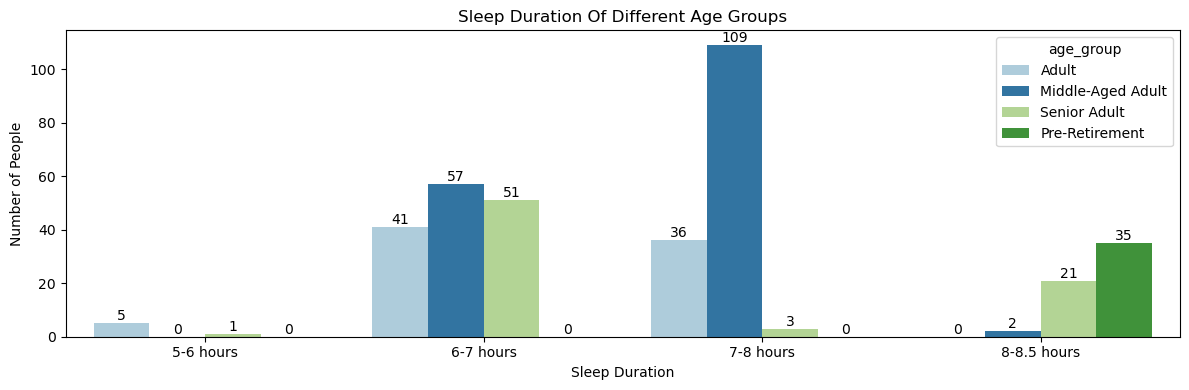

In [28]:
plt.figure(figsize=(12,4))
ax=sns.barplot(data=sleep_duration_group_by_age_group, x='sleep_duration_group', y='count', hue='age_group', palette="Paired")

for container in ax.containers:
    ax.bar_label(container)
    
plt.title('Sleep Duration Of Different Age Groups')
plt.xlabel('Sleep Duration')
plt.ylabel('Number of People')
plt.tight_layout()
plt.show()

#### 4.SLEEP DURATION BY GENDER

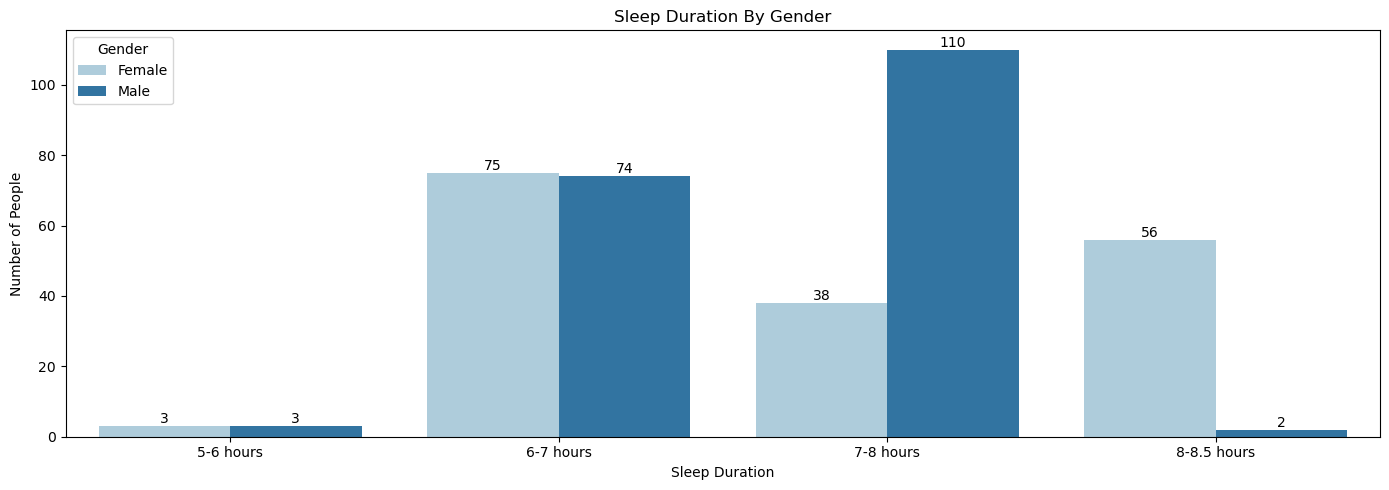

In [29]:
sleep_duration_by_gender=df.groupby(['Gender','sleep_duration_group']).size().reset_index(name='Count')
sleep_duration_by_gender.head()

plt.figure(figsize=(14,5))
ax=sns.barplot(data=sleep_duration_by_gender, x='sleep_duration_group', y='Count', hue='Gender', palette="Paired")
sns.move_legend(ax, "upper left")

for container in ax.containers:
    ax.bar_label(container)
    
plt.title('Sleep Duration By Gender')
plt.xlabel('Sleep Duration')
plt.ylabel('Number of People')
plt.tight_layout()
plt.show()

#### 5.QUALITY OF SLEEP BY GENDER

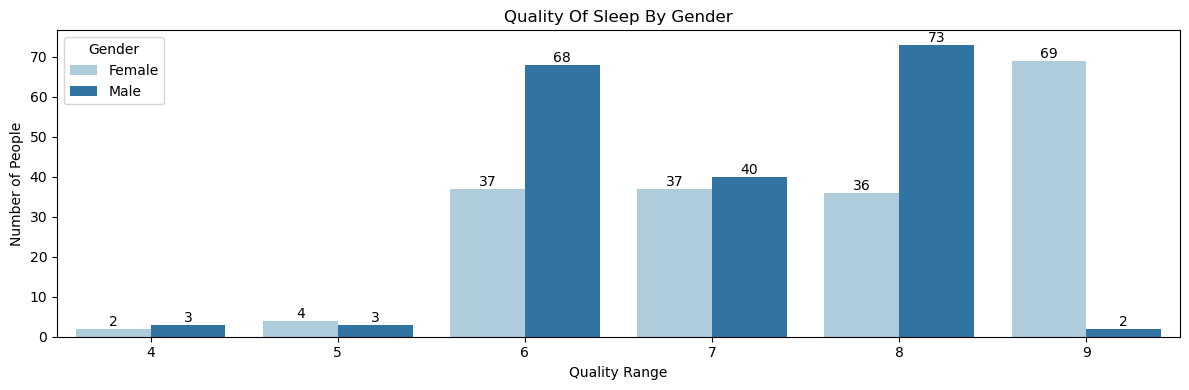

In [30]:
quality_of_sleep_by_gender = df.groupby(['Gender', 'Quality of Sleep']).size().reset_index(name='Count')
quality_of_sleep_by_gender

plt.figure(figsize=(12,4))
ax=sns.barplot(data=quality_of_sleep_by_gender, x='Quality of Sleep', y='Count', hue='Gender', palette="Paired")

for container in ax.containers:
    ax.bar_label(container)
    
plt.title('Quality Of Sleep By Gender')
plt.xlabel('Quality Range')
plt.ylabel('Number of People')
plt.tight_layout()
plt.show()

#### 6.QUALITY OF SLEEP BY AGE GROUP

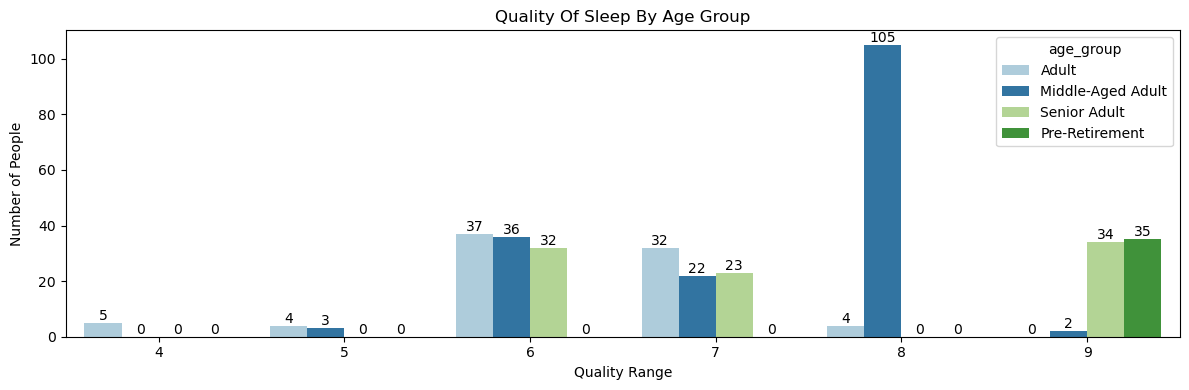

In [31]:
quality_of_sleep_by_age_group = df.groupby(['age_group', 'Quality of Sleep']).size().reset_index(name='Count')
quality_of_sleep_by_age_group

plt.figure(figsize=(12,4))
ax=sns.barplot(data=quality_of_sleep_by_age_group, x='Quality of Sleep', y='Count', hue='age_group', palette="Paired")

for container in ax.containers:
    ax.bar_label(container)
    
plt.title('Quality Of Sleep By Age Group')
plt.xlabel('Quality Range')
plt.ylabel('Number of People')
plt.tight_layout()
plt.show()

#### 7.QUALITY OF SLEEP BY OCCUPATION

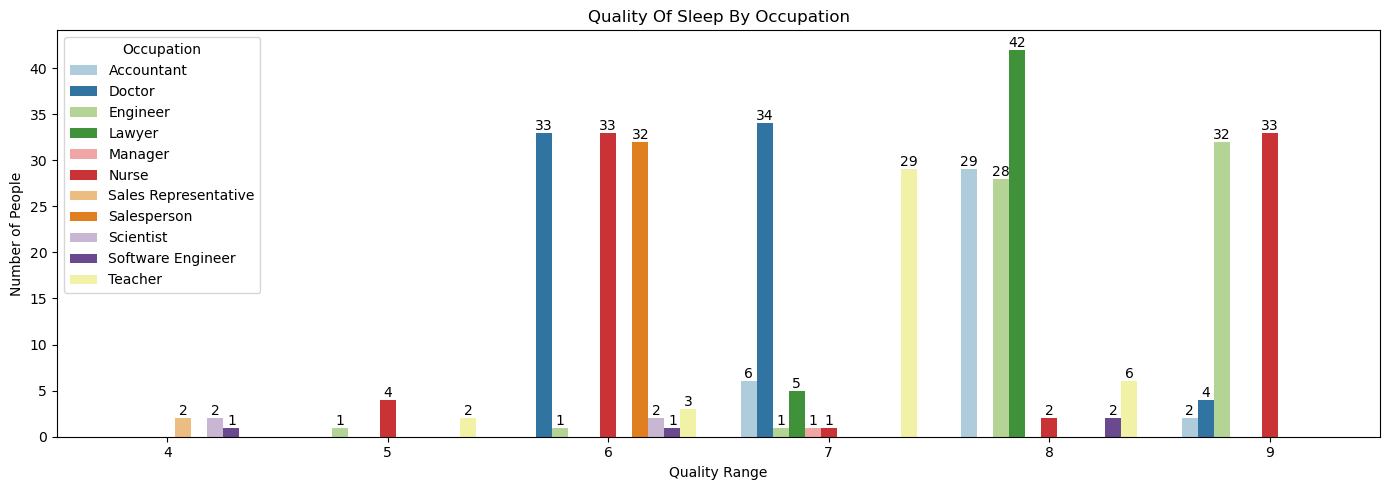

In [32]:
quality_of_sleep_by_occupation=df.groupby(['Occupation','Quality of Sleep']).size().reset_index(name='Count')

plt.figure(figsize=(14,5))
ax=sns.barplot(data=quality_of_sleep_by_occupation, x='Quality of Sleep', y='Count', hue='Occupation', palette="Paired")
sns.move_legend(ax, "upper left")

for container in ax.containers:
    ax.bar_label(container)
    
plt.title('Quality Of Sleep By Occupation')
plt.xlabel('Quality Range')
plt.ylabel('Number of People')
plt.tight_layout()
plt.show()

#### 8.QUALITY OF SLEEP BY PHYSICAL ACTIVITY

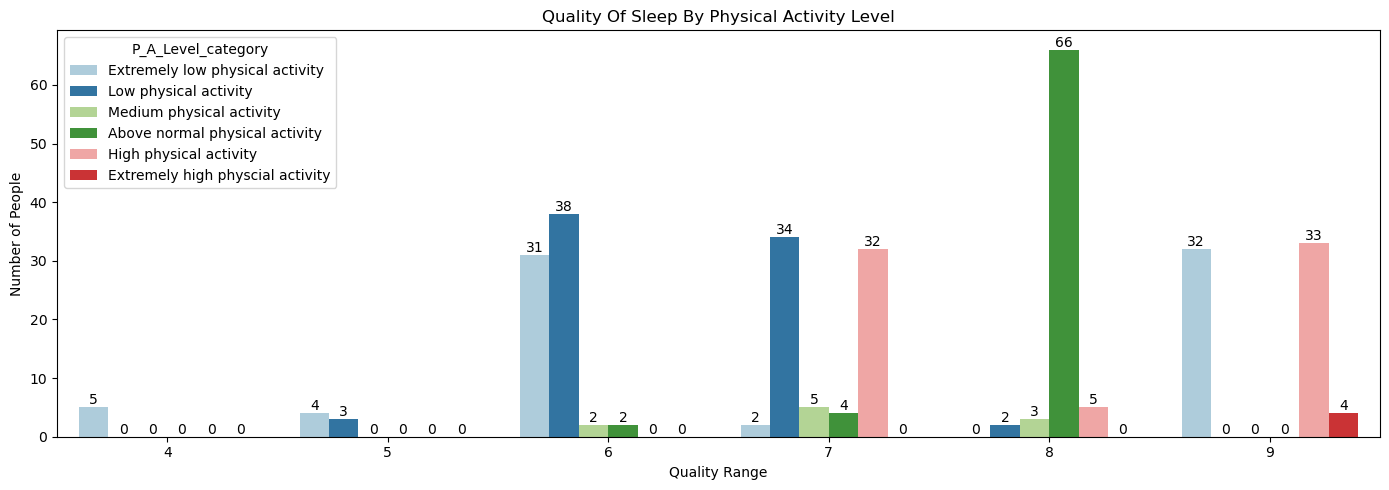

In [33]:
df['Physical Activity Level'].unique()
df.head()

P_A_Level_bin = [30, 40, 50, 60, 70, 80, 90]
labels=[
    'Extremely low physical activity',
    'Low physical activity',
    'Medium physical activity',
    'Above normal physical activity',
    'High physical activity',
    'Extremely high physcial activity'
]

df['P_A_Level_category'] = pd.cut(df['Physical Activity Level'], bins=P_A_Level_bin, labels=labels, right=False)
df

quality_of_sleep_by_P_A_level_group=df.groupby(['P_A_Level_category','Quality of Sleep']).size().reset_index(name='Count')
quality_of_sleep_by_P_A_level_group.head()

plt.figure(figsize=(14,5))
ax=sns.barplot(data=quality_of_sleep_by_P_A_level_group, x='Quality of Sleep', y='Count', hue='P_A_Level_category', palette="Paired")
sns.move_legend(ax, "upper left")

for container in ax.containers:
    ax.bar_label(container)
    
plt.title('Quality Of Sleep By Physical Activity Level')
plt.xlabel('Quality Range')
plt.ylabel('Number of People')
plt.tight_layout()
plt.show()

#### 9.RELATIONSHIP BETWEEN QUALITY OF SLEEP AND PHYSICAL ACTIVITY

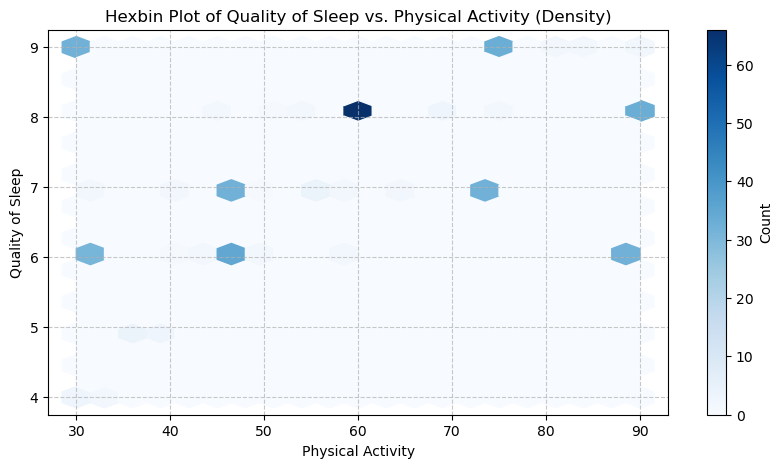

In [34]:
plt.figure(figsize=(10, 5))
plt.hexbin(x=df['Physical Activity Level'], y=df['Quality of Sleep'], gridsize=20, cmap='Blues')
plt.colorbar(label='Count')
plt.title('Hexbin Plot of Quality of Sleep vs. Physical Activity (Density)')
plt.xlabel('Physical Activity')
plt.ylabel('Quality of Sleep')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

#### 10.RELATION BETWEEN OCCUPATION AND BLOOD PRESSURE 

###### Exract Systolic Pressure as a Numerical Column

In [35]:
# We'll create a new column 'Systolic_BP'
df['Systolic_BP'] = df['Blood Pressure'].apply(lambda x: int(x.split('/')[0]))

print("\nDataFrame after extracting Systolic BP:")
print(df.head())
print("-" * 30)

# --- 3. Define Numerical Bins and Labels for pd.cut() ---
# Based on your desired labels and the systolic values from your original bins.
# We'll use the systolic values from your example for the cut points: 115, 120, 128, 132, 142.
# 'right=False' means the bin is [start, end), excluding the right endpoint.
# 'include_lowest=True' ensures that the very first bin includes its lower bound (115 in this case).

bins = [114,    # Values <= 114 would be outside, but 115 is our lowest bound for 'Low BP'
        119,    # Up to 119 for 'Low BP'
        127,    # Up to 127 for 'Normal BP'
        131,    # Up to 131 for 'High BP'
        141,    # Up to 141 for 'High BP stage 2'
        np.inf] # From 142 onwards (or whatever the highest value is) for 'High BP stage 2'

labels = [
    'Low BP',
    'Normal BP',
    'High BP',
    'High BP stage 2',
    'Very High BP' # Added an extra label for the last bin
]

# Adjusting labels if you strictly need 4 categories
# If you want exactly 4 labels, you need 5 bins.
# Let's re-align with your 4 labels for the given bins.
# This means the last bin will merge the "High BP stage 2" with anything above it.

bins_4_labels = [114, # For 'Low BP'
                 119, # For 'Normal BP'
                 127, # For 'High BP'
                 131, # For 'High BP stage 2' (starting here)
                 np.inf] # Covers all values from 132 onwards

labels_4 = [
    'Low BP',
    'Normal BP',
    'High BP',
    'High BP stage 2' # This will cover 132+
]


# --- 4. Apply pd.cut() to the Systolic Pressure ---
df['Blood Pressure Group'] = pd.cut(
    df['Systolic_BP'],
    bins=bins_4_labels,
    labels=labels_4,
    right=False,          # Bins are [start, end), so 115 is in the first bin, 120 in the second, etc.
    include_lowest=True   # Ensures values exactly at the lowest bin boundary (115) are included
)

print("\nDataFrame with 'Blood Pressure Group':")
print(df[['Blood Pressure', 'Systolic_BP', 'Blood Pressure Group']].head(10)) # Showing first 10 for brevity

print("\n--- Summary of Categories ---")
print(df['Blood Pressure Group'].value_counts().sort_index())


DataFrame after extracting Systolic BP:
   Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder age_group  \
0         126/83          77         4200

In [36]:
df
bp_group=df.groupby(['Blood Pressure Group','Occupation']).size().reset_index(name='count')
bp_group

,Blood Pressure Group,Occupation,count
0,Low BP,Accountant,29
1,Low BP,Doctor,2
2,Low BP,Engineer,1
3,Low BP,Lawyer,0
4,Low BP,Manager,0
5,Low BP,Nurse,1
6,Low BP,Sales Representative,0
7,Low BP,Salesperson,0
8,Low BP,Scientist,0
9,Low BP,Software Engineer,0


###### Plot.1 - Barplot

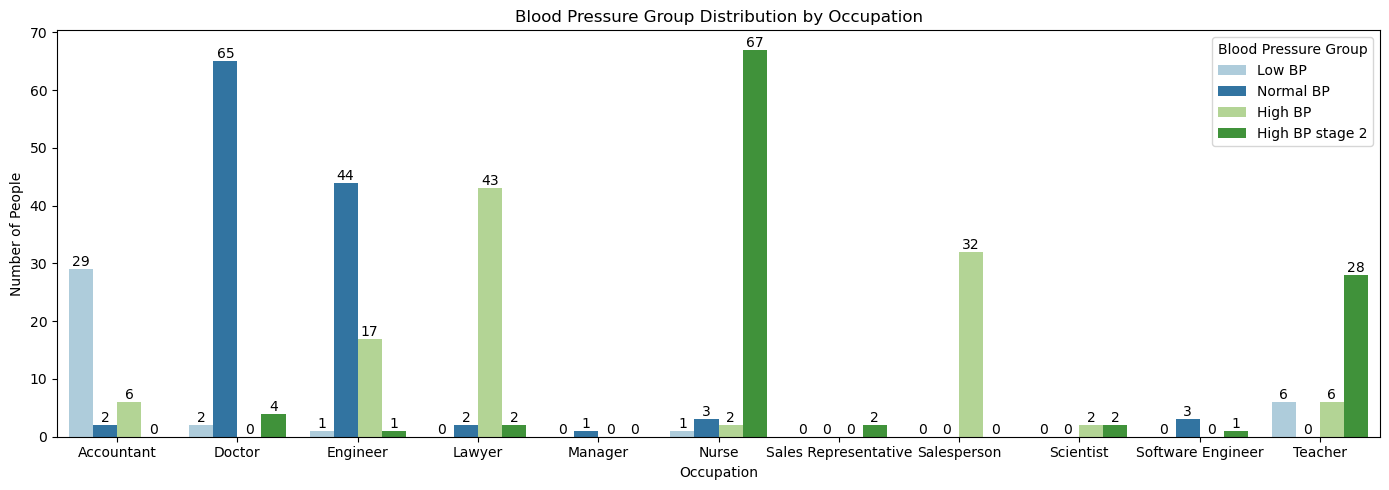

In [37]:
plt.figure(figsize=(14,5))
ax=sns.barplot(data=bp_group, x='Occupation', y='count', hue='Blood Pressure Group', palette="Paired")
sns.move_legend(ax, "upper right")

for container in ax.containers:
    ax.bar_label(container)
    
plt.title('Blood Pressure Group Distribution by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Number of People')
plt.tight_layout()
plt.show()


##### Plot.2 Stripplot - Individual BP Readings

C:\Users\faizan.arshad\AppData\Local\Temp\ipykernel_21184\133820020.py:17: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Occupation', y='Blood Pressure Group', data=df, jitter=0.2,


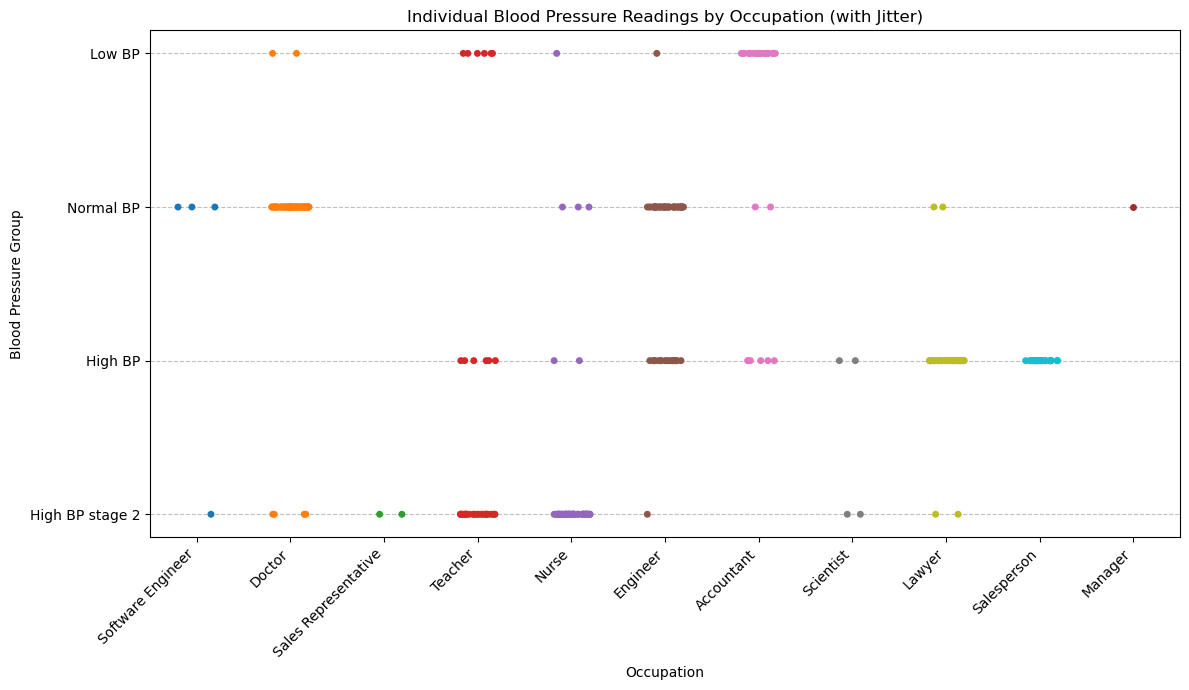

In [38]:
# Define your custom palette
color_palette_11 = [
    "#1f77b4",  # Muted Blue
    "#ff7f0e",  # Safety Orange
    "#2ca02c",  # Cooked Asparagus Green
    "#d62728",  # Brick Red
    "#9467bd",  # Muted Purple
    "#8c564b",  # Chestnut Brown
    "#e377c2",  # Raspberry Pink
    "#7f7f7f",  # Middle Gray
    "#bcbd22",  # Yellowish-Green / Olive
    "#17becf",  # Blue-Green / Cyan
    "#a52a2a"   # Darker Red / Brown (similar to maroon) for contrast
]

plt.figure(figsize=(12, 7))
sns.stripplot(x='Occupation', y='Blood Pressure Group', data=df, jitter=0.2,
              palette=color_palette_11, # <-- Corrected line: pass the variable 'custom_palette'
              s=5)
plt.title('Individual Blood Pressure Readings by Occupation (with Jitter)')
plt.xlabel('Occupation')
plt.ylabel('Blood Pressure Group')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()

#### 11.RELATION BETWEEN OCCUPATION AND PHYSICAL ACTIVITY

C:\Users\faizan.arshad\AppData\Local\Temp\ipykernel_21184\3152418713.py:5: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Occupation', y='Physical Activity Level', data=df, jitter=0.2,


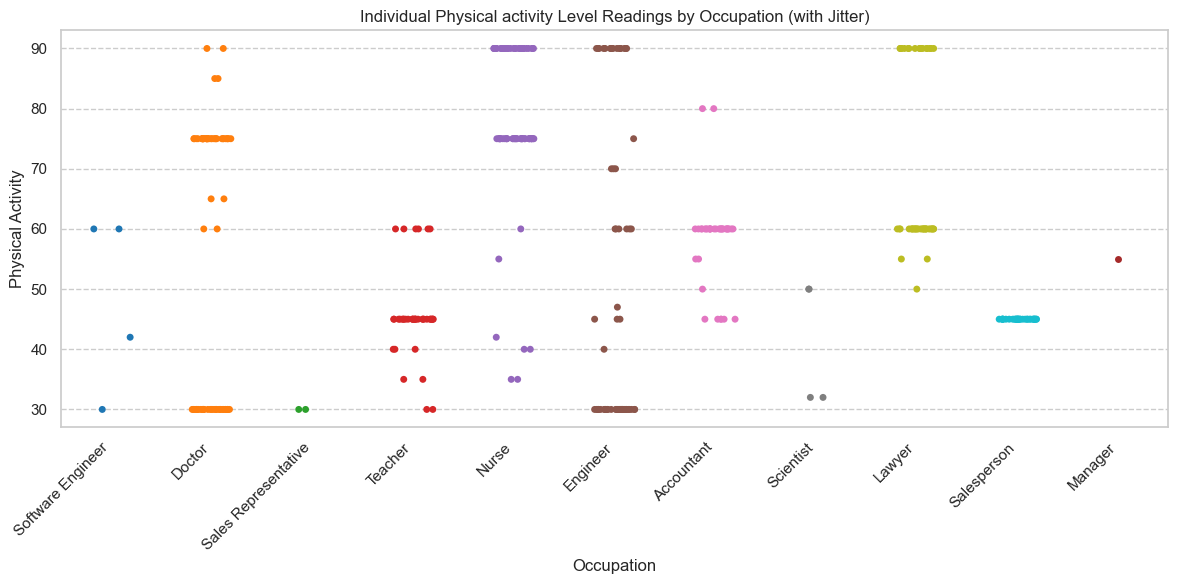

In [41]:
PA_level_group=df.groupby(['Physical Activity Level','Occupation']).size().reset_index(name='count')
PA_level_group

plt.figure(figsize=(12,6))
sns.stripplot(x='Occupation', y='Physical Activity Level', data=df, jitter=0.2,
              palette=color_palette_11, # <-- Corrected line: pass the variable 'custom_palette'
              s=5)
plt.title('Individual Physical activity Level Readings by Occupation (with Jitter)')
plt.xlabel('Occupation')
plt.ylabel('Physical Activity')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=1)
plt.tight_layout()
plt.show()

#### 12.RELATION BETWEEN OCCUPATION AND BMI CATEGORY

[Text(189.25, 0.5, 'Number of people')]

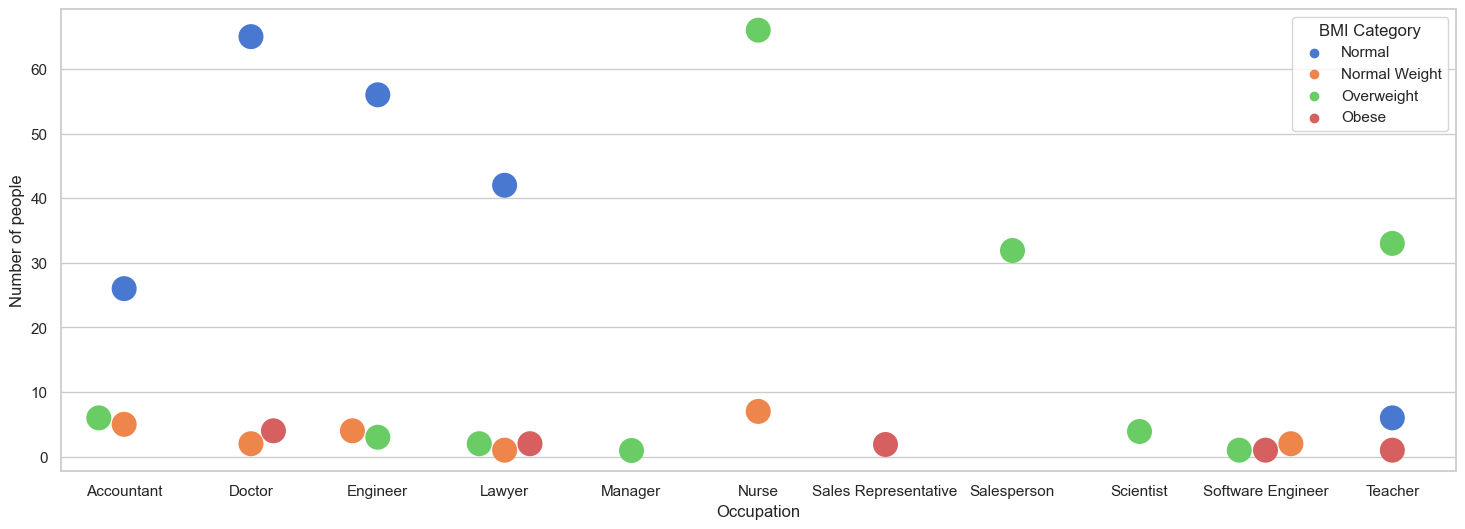

In [40]:
df
df['BMI Category'].unique()
occupation_by_bmi=df.groupby(['Occupation','BMI Category']).size().reset_index(name='count')

sns.set_theme(style="whitegrid", palette="muted")

plt.figure(figsize=(18,6))
# Draw a categorical scatterplot to show each observation
ax = sns.swarmplot(data=occupation_by_bmi, x="Occupation", y="count", hue="BMI Category", size=18)
ax.set(ylabel="Number of people")

# Observations

##### 1. Females are more prone to sleep apnea.
##### 2.Out of all the profession nurses are suffering most from sleep apnea.
##### 3.Salesperson, sales representative and teachers are suffering from insomnia the most.
##### 4.On a large scale the doctors and engineers are having no disorders.
##### 5.100% of the people close to retirement are sleeping more than 8 hours.
##### 6.While the adults are sleeping comparatively less than the rest of the population.
##### 7.41% of the total population are getting 6-7 hours of sleep.
##### 8.Almost 60% of the Male population are getting 7-8 hours of sleep.
##### 9.82% of the female population are getting better sleep ranging from 7-9, while the male population is 60%
##### 10.Almost none of the adults get best quality of sleep.
##### 11.While people close to retirement get best sleep quality.
##### 12.The middle aged adults are getting good quality of sleep.
##### 13.Sales representatives and salespersons are getting the worst quality of sleep.
##### 14.While the lawyers are getting on an average the best quality of sleep.
##### 15.Engineers, accountants and lawyers are getting good quality of sleep.
##### 16.People who are doing high physical activity are having better quality of sleep.
##### 17.People who are having low to extremely low physical activity are getting bad quality of sleep.
##### 18.The people who are extremely high physical activity get the best sleep.
##### 19.The mode of sleep quality for the distribution is around 8.
##### 20.The nurses and teachers are suffering most from high bp stage 2.
##### 21.Lawyers and Salesperson are suffring most from high bp.
##### 22.Doctors and engineers are having normal bp.
##### 23.Acountants and Teachers are suffering from low bp.
##### 24.Sales representatives, salesperson and teachers are doing very low physical activity.
##### 25.Nurses, engineers and lawyers are doing high physical activity.
##### 26.Most of the nurses are overweight.
##### 27.Doctors, engineers, lawyers and accountants are mostly fit.
##### 27.Most of the Salesperson and teachers are also overweight.

# Conclusion

## Gender-Based Sleep Patterns
#### Females are more prone to sleep apnea but overall, 82% get 7–9 hours of sleep—better than 60% of males.

#### Almost none of the adults (age group not close to retirement) achieve the best sleep quality.

## Age-Based Observations
#### People close to retirement consistently get 8+ hours of sleep and enjoy the best sleep quality.

#### Adults tend to sleep less and experience poor sleep quality.

#### Middle-aged adults report good sleep quality.

## Profession and Sleep Disorders
#### Nurses are most affected by sleep apnea and high blood pressure (Stage 2).

#### Salespersons, sales representatives, and teachers suffer most from insomnia, poor sleep quality, low physical activity, and high blood pressure.

#### Doctors and engineers generally have no major sleep disorders, normal blood pressure, and are physically active.

#### Lawyers enjoy the best sleep quality on average and also show high physical activity.

#### Accountants and teachers report low blood pressure.

## Physical Activity & Sleep Quality
#### Higher physical activity correlates with better sleep quality.

#### Those with extremely high activity experience the best sleep.

#### Low to extremely low activity results in poor sleep quality.

#### Nurses, engineers, and lawyers are highly active, while sales professionals and teachers have the lowest activity levels.

## Weight & Fitness Trends
#### Nurses, teachers, and salespersons are more likely to be overweight.

#### Doctors, engineers, lawyers, and accountants are generally fit.

## Overall Sleep Trends
#### 41% of the population get 6–7 hours of sleep.

#### The most common (mode) sleep quality score in the dataset is 8, indicating a moderately high average.